<div style="border-radius:10px; border:#242e87 solid; padding: 15px; background-color: #9feced; font-size:100%; text-align:left">

<h3 align="left"><font color='#242e87'>💡 Inspiration:</font></h3>
    
* Purpose: to predict Google stock 📈

* Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

* In this notebook, we will discover and explore data from the Google stock .We will learn how to visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#3d9fcc; font-size:140%; text-align:left;padding: 10px; border-bottom: 3px solid #242e87"> Import Libraries</p>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#3d9fcc; font-size:140%; text-align:left;padding: 10px; border-bottom: 3px solid #242e87"> Loading Data</p>

In [34]:
Data = pd.read_csv('/kaggle/input/google-stock-prediction/GOOG.csv')

In [35]:
df = pd.DataFrame(Data)
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#3d9fcc; font-size:140%; text-align:left;padding: 10px; border-bottom: 3px solid #242e87"> Data Analysis</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1258 entries, 0 to 1257

Data columns (total 14 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   symbol       1258 non-null   object 

 1   date         1258 non-null   object 

 2   close        1258 non-null   float64

 3   high         1258 non-null   float64

 4   low          1258 non-null   float64

 5   open         1258 non-null   float64

 6   volume       1258 non-null   int64  

 7   adjClose     1258 non-null   float64

 8   adjHigh      1258 non-null   float64

 9   adjLow       1258 non-null   float64

 10  adjOpen      1258 non-null   float64

 11  adjVolume    1258 non-null   int64  

 12  divCash      1258 non-null   float64

 13  splitFactor  1258 non-null   float64

dtypes: float64(10), int64(2), object(2)

memory usage: 137.7+ KB


**there is not missing value**

In [36]:
df = df.drop(['symbol'],axis=1)

In [37]:
df['date']= df['date'].str.split(" ", n = 1, expand = True)[0]
df['date']= pd.to_datetime(df['date'])

In [45]:
# Resample data to hourly basis
df1 = df.set_index('date').resample('m').first()
df1

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,MA for 10 days,MA for 20 days,MA for 50 days
date,,,,,,,,,,,,,,,
2016-06-30,718.27,722.4700,713.1200,716.48,1306065,718.27,722.4700,713.1200,716.48,1306065,0.0,1.0,697.173,NaN,NaN
2016-07-31,699.21,700.6500,692.1301,692.20,1344710,699.21,700.6500,692.1301,692.20,1344710,0.0,1.0,688.792,697.8085,NaN
2016-08-31,772.88,780.4300,761.0900,761.09,2700470,772.88,780.4300,761.0900,761.09,2700470,0.0,1.0,746.706,729.3800,735.3656
2016-09-30,768.78,771.0200,764.3000,769.25,925131,768.78,771.0200,764.3000,769.25,925131,0.0,1.0,770.531,776.1645,744.5512
2016-10-31,772.56,776.0650,769.5000,774.25,1278821,772.56,776.0650,769.5000,774.25,1278821,0.0,1.0,778.538,773.9165,771.9296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,1901.35,1922.3918,1850.9300,1853.57,1602182,1901.35,1922.3918,1850.9300,1853.57,1602182,0.0,1.0,1871.769,1813.0320,1786.6550
2021-03-31,2081.51,2086.5200,2046.1000,2056.52,1405115,2081.51,2086.5200,2046.1000,2056.52,1405115,0.0,1.0,2084.919,2069.0145,1898.8360
2021-04-30,2137.75,2142.9400,2096.8900,2097.95,1698978,2137.75,2142.9400,2096.8900,2097.95,1698978,0.0,1.0,2057.759,2064.0515,2039.0308


In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1258,2018-12-12 03:26:02.480126976,2016-06-14 00:00:00,2017-09-12 06:00:00,2018-12-11 12:00:00,2020-03-12 18:00:00,2021-06-11 00:00:00,NaN
close,1258.0,1216.317067,668.26,960.8025,1132.46,1360.595,2521.6,383.333358
high,1258.0,1227.430934,672.3,968.7575,1143.935,1374.345,2526.99,387.570872
low,1258.0,1204.17643,663.284,952.1825,1117.915,1348.5575,2498.29,378.777094
open,1258.0,1215.260779,671.0,959.005,1131.15,1361.075,2524.92,382.446995
volume,1258.0,1601590.091415,346753.0,1173521.5,1412588.5,1812156.0,6207027.0,696017.226844
adjClose,1258.0,1216.317067,668.26,960.8025,1132.46,1360.595,2521.6,383.333358
adjHigh,1258.0,1227.430936,672.3,968.7575,1143.935,1374.345,2526.99,387.570873
adjLow,1258.0,1204.176436,663.284,952.1825,1117.915,1348.5575,2498.29,378.777099
adjOpen,1258.0,1215.260779,671.0,959.005,1131.15,1361.075,2524.92,382.446995


**We have only 251 records in one year because weekends are not included in the data.**

<div style="border-radius:10px; border:#242e87 solid; padding: 15px; background-color: #9feced; font-size:100%; text-align:left">

<h3 align="left"><font color='#242e87'>📌 Description of some Variables:</font></h3>
    
* Closing Price: The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.
    
* Volume of Sales: Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.
    
* Adjusted close:  is the closing price after adjustments for all applicable splits and dividend distributions.
    
* Cash dividend : is a distribution paid to stockholders as part of the corporation's current earnings or accumulated profits in the form of cash.

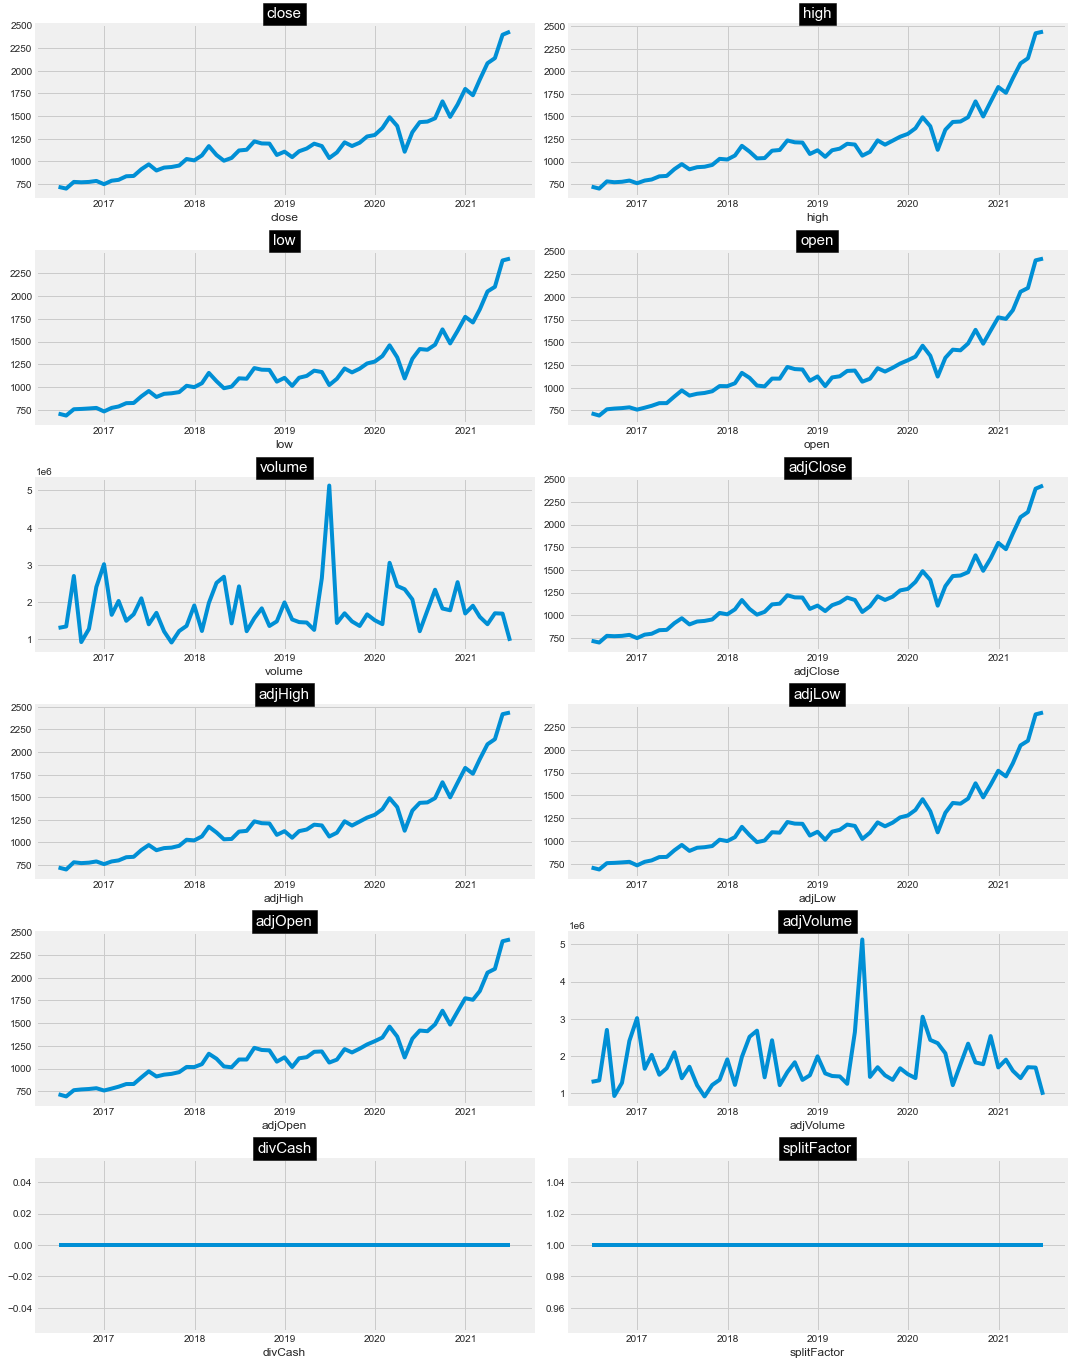

In [21]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(df1):
    plt.subplot(8, 2, idx + 1)
    plt.plot(df.index.values,df[i])
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

<div style="border-radius:10px; border:#242e87 solid; padding: 15px; background-color: #9feced; font-size:100%; text-align:left">

<h3 align="left"><font color='#242e87'>📌 Moving Average:</font></h3>
    
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

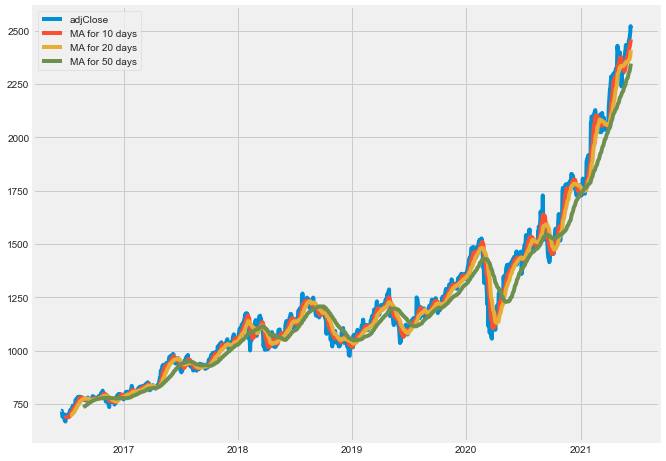

In [48]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['adjClose'].rolling(ma).mean()   

plt.figure(figsize=(10,8))

plt.plot(df['date'],df['adjClose'],label='adjClose')
plt.plot(df['date'],df[ 'MA for 10 days'],label= 'MA for 10 days')
plt.plot(df['date'],df['MA for 20 days'],label= 'MA for 20 days')
plt.plot(df['date'],df['MA for 50 days'],label= 'MA for 50 days')

plt.legend()
fig.tight_layout()
plt.show()

**We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.**

<div style="border-radius:10px; border:#242e87 solid; padding: 15px; background-color: #9feced; font-size:100%; text-align:left">

<h3 align="left"><font color='#242e87'>📌 Analyze the Risk:</font></h3>
    
 Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Google stock.

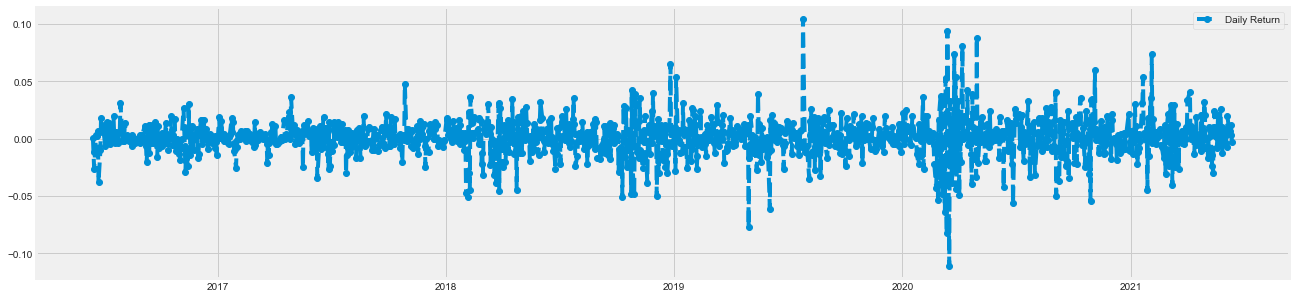

In [54]:
# We'll use pct_change to find the percent change for each day
df['Daily Return'] = df['adjClose'].pct_change()

# Then we'll plot the daily return percentage
plt.figure(figsize=(20,5))

plt.plot(df['date'],df['Daily Return'],label='Daily Return',linestyle='--', marker='o')

plt.legend()
plt.show()

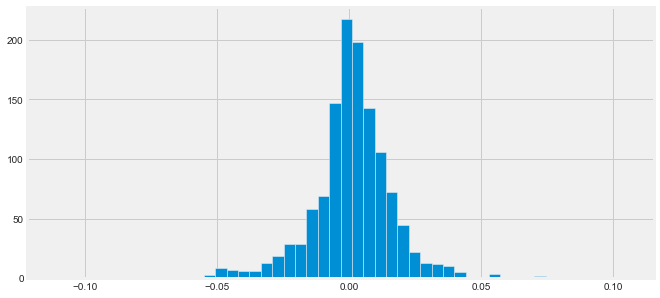

In [58]:
plt.figure(figsize=(10,5))
plt.hist(df['Daily Return'],bins=50)
plt.show()

> ## How much value do we put at risk by investing in a particular stock?
 There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

Text(0, 0.5, 'Risk')

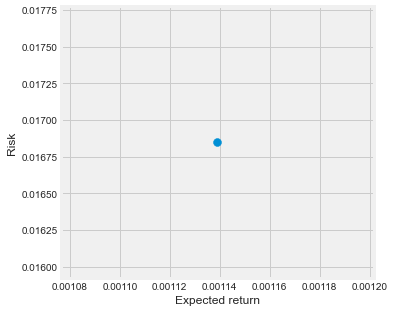

In [61]:
tech_rets = df['adjClose'].pct_change()
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(5,5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#3d9fcc; font-size:140%; text-align:left;padding: 10px; border-bottom: 3px solid #242e87"> Modeling by LSTM</p>

In [65]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1007

In [67]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [127]:
train = scaled_data[0:int(training_data_len), :]

time_step = 30

##### Create the training data set

x_train = []
y_train = []

for i in range(time_step, len(train)):
    x_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


# Create the testing data set
test = scaled_data[training_data_len-time_step:, :]

# Create the data sets x_test and y_test
x_test = []
y_test =  dataset[training_data_len:, :]

for i in range(time_step, len(test)):
    x_test.append(test[i-time_step:i, 0])
    
    
# Convert the data to a numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,

       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,

       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,

       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,

       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,

       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598])]

[0.03966352639019283]



[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,

       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,

       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,

       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,

       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,

       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598]), array([0.02733443, 0.02271575, 0.01265823, 0.01373196, 0.0149352 ,

       0.01575534, 0.01813483, 0.00375538, 0.        , 0.00635609,

       0.00855213,

In [131]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
MODEL = model.fit(x_train, y_train,validation_data=(x_test, y_test), batch_size=64, epochs=10)
#MODEL = model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10

16/16 [==============================] - 4s 94ms/step - loss: 0.0111 - accuracy: 0.0000e+00 - val_loss: 3478471.5000 - val_accuracy: 0.0000e+00

Epoch 2/10

16/16 [==============================] - 1s 47ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 3478192.2500 - val_accuracy: 0.0000e+00

Epoch 3/10

16/16 [==============================] - 1s 61ms/step - loss: 5.6991e-04 - accuracy: 0.0000e+00 - val_loss: 3477898.0000 - val_accuracy: 0.0000e+00

Epoch 4/10

16/16 [==============================] - 1s 47ms/step - loss: 4.3289e-04 - accuracy: 0.0000e+00 - val_loss: 3477821.2500 - val_accuracy: 0.0000e+00

Epoch 5/10

16/16 [==============================] - 1s 47ms/step - loss: 3.8754e-04 - accuracy: 0.0000e+00 - val_loss: 3477866.0000 - val_accuracy: 0.0000e+00

Epoch 6/10

16/16 [==============================] - 1s 46ms/step - loss: 3.7586e-04 - accuracy: 0.0000e+00 - val_loss: 3477827.0000 - val_accuracy: 0.0000e+00

Epoch 7/10

16/16 [=======================

In [132]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 20ms/step


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#3d9fcc; font-size:140%; text-align:left;padding: 10px; border-bottom: 3px solid #242e87"> Evaluation</p>

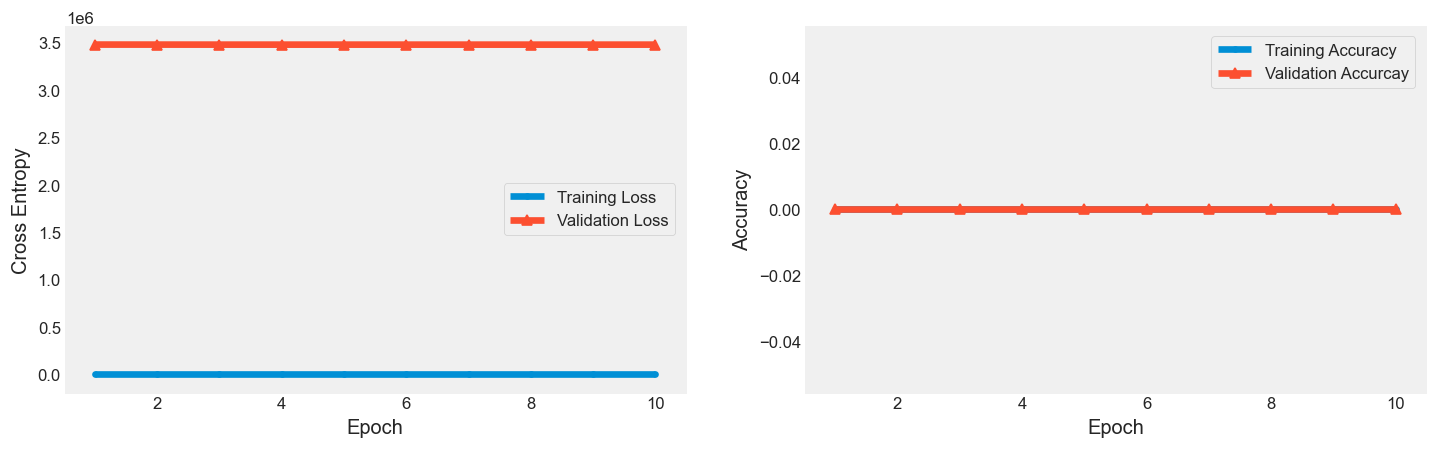

In [134]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2) 
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()
    
plot_training_curves(pd.DataFrame(MODEL.history))

In [145]:
from sklearn.metrics import mean_squared_error,r2_score

r2Score_test = r2_score(y_test, predictions)
print('test R2 Score: %.2f ' % (r2Score_test))


test R2 Score: 0.96 


In [135]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

62.347790493365736

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#3d9fcc; font-size:140%; text-align:left;padding: 10px; border-bottom: 3px solid #242e87"> Conclusion</p>

C:\Users\WIN10U~1\AppData\Local\Temp/ipykernel_2664/354181777.py:4: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  valid['Predictions'] = predictions


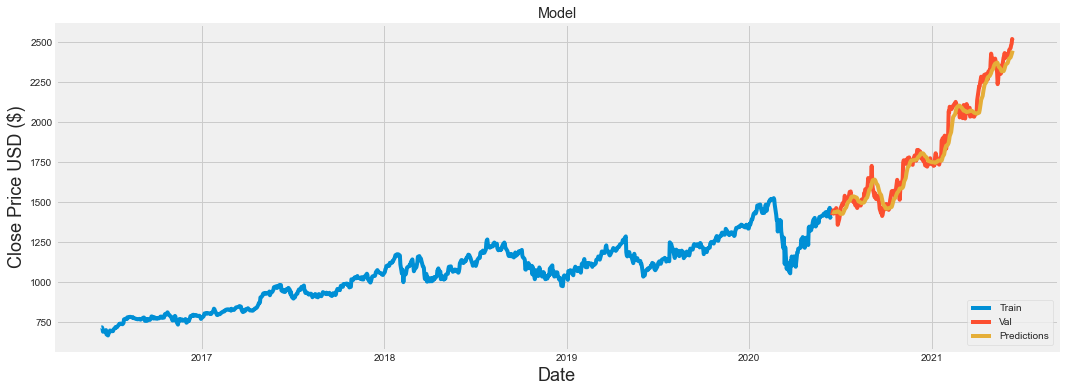

In [141]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df['date'].iloc[:1007],train['close'])
plt.plot(df['date'].iloc[1007:],valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()